# Homework 2 - Problem 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Since type A has a greater mean than type B:

- For type A: $C(x) = 1$
- For type B: $C(x) = -1$

So given that it is type B ($C = -1$) yet classified as type A ($\hat{C} = 1$) we have:

$P(\hat{C} = A|C = B) = \int_{T}^{\infty}p_{4,1.4}(x)dx$ since the probability distribution is for type B in the classification interval of type A.

And given that it is type A ($C = 1$) yet classified as type B ($\hat{C} = -1$) we have:

$P(\hat{C} = B|C = A) = \int_{-\infty}^{T}p_{5,2}(x)dx$ since the probability distribution is for type A in the classification interval of type B.

We will be approximating integration using the trapezoid rule since we are taking individual data points instead of a continuous interval.

In [2]:
# Probability density function
def calculate_prob(xs: np.array, mu: float, sigma: float) -> np.array:
    first = 1 / (sigma * np.sqrt(2 * np.pi))
    expo_1 = -1 / 2
    expo_2 = ((xs - mu) / sigma) ** 2
    exp = np.exp(expo_1 * expo_2)

    return first * exp

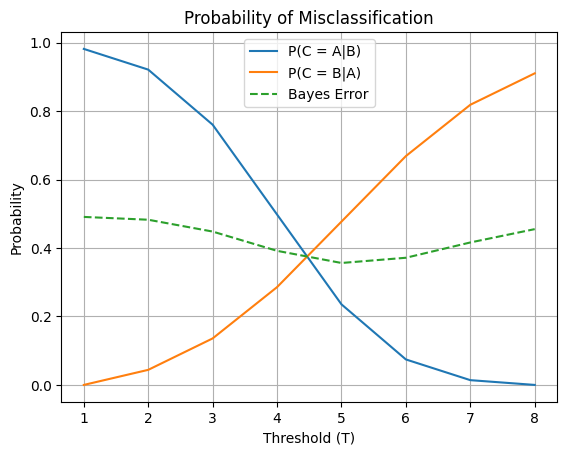

In [20]:
A_mu = 5
A_sigma = 2
B_mu = 4
B_sigma = 1.4

threshold_values = np.linspace(1, 8, num=8)

prob_class_A_given_B = []
prob_class_B_given_A = []
for T in threshold_values:
    # Probability B is above threshold
    x_values_B = np.linspace(T, 8, num=1000)
    y_values_B = calculate_prob(x_values_B, B_mu, B_sigma)
    prob_error_B_as_A = ((x_values_B[1:] - x_values_B[:-1]) * 1/2 * (y_values_B[1:] + y_values_B[:-1])).sum()
    prob_class_A_given_B.append(prob_error_B_as_A)
    
    # Probability A is below threshold
    x_values_A = np.linspace(1, T, num=1000)
    y_values_A = calculate_prob(x_values_A, A_mu, A_sigma)
    prob_error_A_as_B = ((x_values_A[1:] - x_values_A[:-1]) * 1/2 * (y_values_A[1:] + y_values_A[:-1])).sum()
    prob_class_B_given_A.append(prob_error_A_as_B)

prob_miss_classification = [ 
    (prob_A_given_B + prob_B_given_A) / 2 
    for prob_A_given_B, prob_B_given_A 
    in zip(prob_class_A_given_B, prob_class_B_given_A) 
]

plt.plot(threshold_values, prob_class_A_given_B, label='P(C = A|B)')
plt.plot(threshold_values, prob_class_B_given_A, label='P(C = B|A)')
plt.plot(threshold_values, prob_miss_classification, label='Bayes Error', linestyle='--')
plt.xlabel('Threshold (T)')
plt.ylabel('Probability')
plt.title('Probability of Misclassification')
plt.legend()
plt.grid(True)
plt.show()


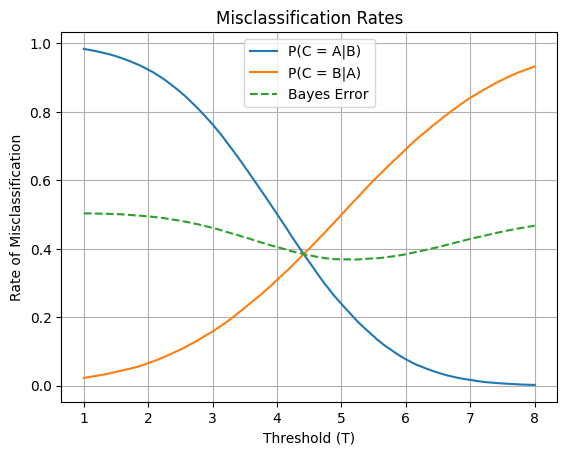

In [21]:
np.random.seed(42)
num_samples = 100000
class_samples = num_samples // 2
threshold_values = np.linspace(1, 8, num=1000)

A_weights = A_sigma * np.random.randn(class_samples) + A_mu
B_weights = B_sigma * np.random.randn(class_samples) + B_mu
all_weights = np.concatenate([A_weights, B_weights])

prob_class_A_given_B = []
prob_class_B_given_A = []
for T in threshold_values:
     # Probability B is above threshold
     prob_A_given_B = np.sum(B_weights > T) / class_samples
     prob_class_A_given_B.append(prob_A_given_B)

     # Probability A is below threshold
     prob_B_given_A = np.sum(A_weights <= T) / class_samples
     prob_class_B_given_A.append(prob_B_given_A)

prob_miss_classification = [ 
    (prob_A_given_B + prob_B_given_A) / 2 
    for prob_A_given_B, prob_B_given_A 
    in zip(prob_class_A_given_B, prob_class_B_given_A) 
]

plt.plot(threshold_values, prob_class_A_given_B, label='P(C = A|B)')
plt.plot(threshold_values, prob_class_B_given_A, label='P(C = B|A)')
plt.plot(threshold_values, prob_miss_classification, label='Bayes Error', linestyle='--')
plt.xlabel('Threshold (T)')
plt.ylabel('Rate of Misclassification')
plt.title('Misclassification Rates')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

It appears that the threshold should be set to ~5.